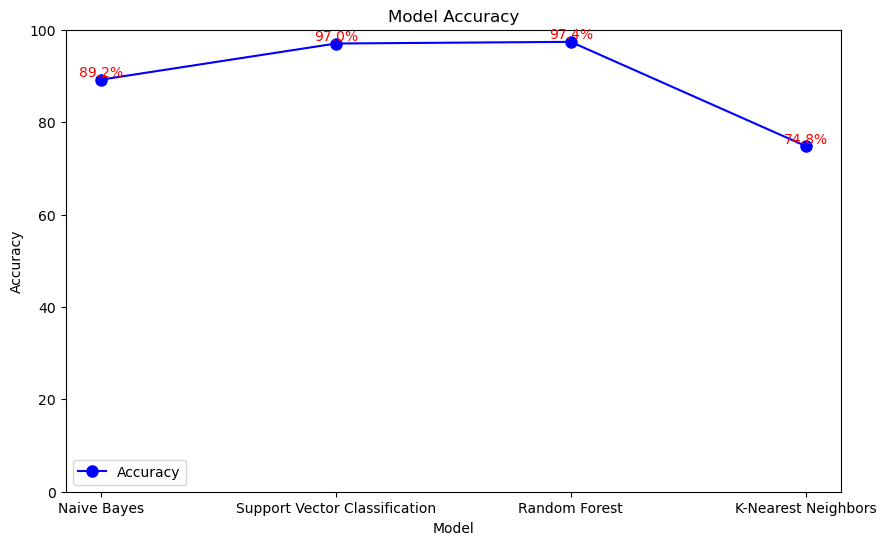

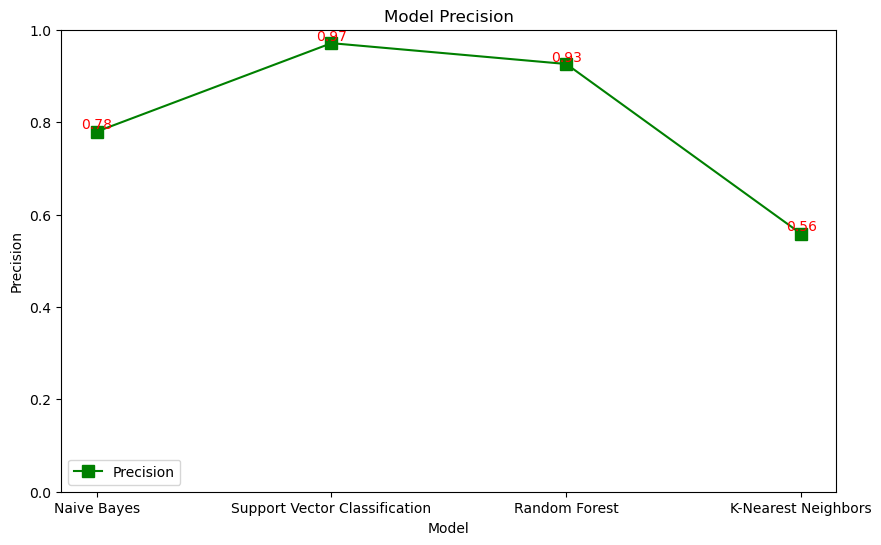

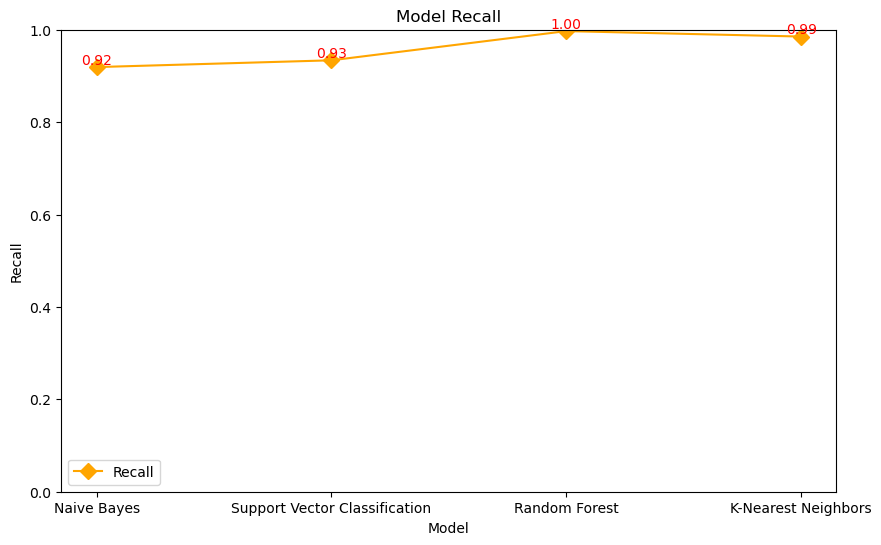

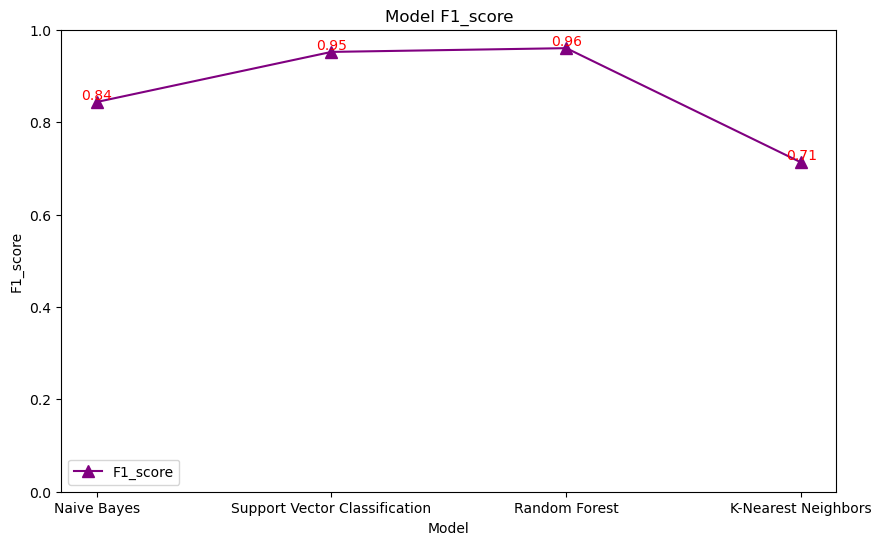

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     20263
           1       0.78      0.92      0.84      9398

    accuracy                           0.89     29661
   macro avg       0.87      0.90      0.88     29661
weighted avg       0.90      0.89      0.89     29661

Confusion Matrix:
[[17818  2445]
 [  760  8638]]


Classification Report for Support Vector Classification:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20263
           1       0.97      0.93      0.95      9398

    accuracy                           0.97     29661
   macro avg       0.97      0.96      0.97     29661
weighted avg       0.97      0.97      0.97     29661

Confusion Matrix:
[[20000   263]
 [  622  8776]]


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     2026

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

df = pd.read_csv('url_spam_classification.csv')


df['is_spam'] = df['is_spam'].astype(int)


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['url'])
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Classification": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred) * 100  
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


results_df = pd.DataFrame(results).T


colors = ['blue', 'green', 'orange', 'purple']
markers = ['o', 's', 'D', '^']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.plot(results_df.index, results_df[metric], color=colors[i], marker=markers[i], markersize=8, label=metric)
    
    
    for j, value in enumerate(results_df[metric]):
        if metric == 'accuracy':  
            plt.text(j, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, color='red')
        else:
            plt.text(j, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='red')

    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Model')
    plt.ylabel(f'{metric.capitalize()}')
    plt.ylim(0, 1 if metric != 'accuracy' else 100)
    plt.legend([metric.capitalize()], loc='lower left')
    plt.show()


for model_name, model in models.items():
    print(f"Classification Report for {model_name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")